# Axes (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to change the order or direction of the axes.

## Solution
Note: In the examples below, where it says something like scale_y_continuous, scale_x_continuous, or ylim, the y can be replaced with x if you want to operate on the other axis.

This is the basic boxplot that we will work with, using the built-in PlantGrowth data set.

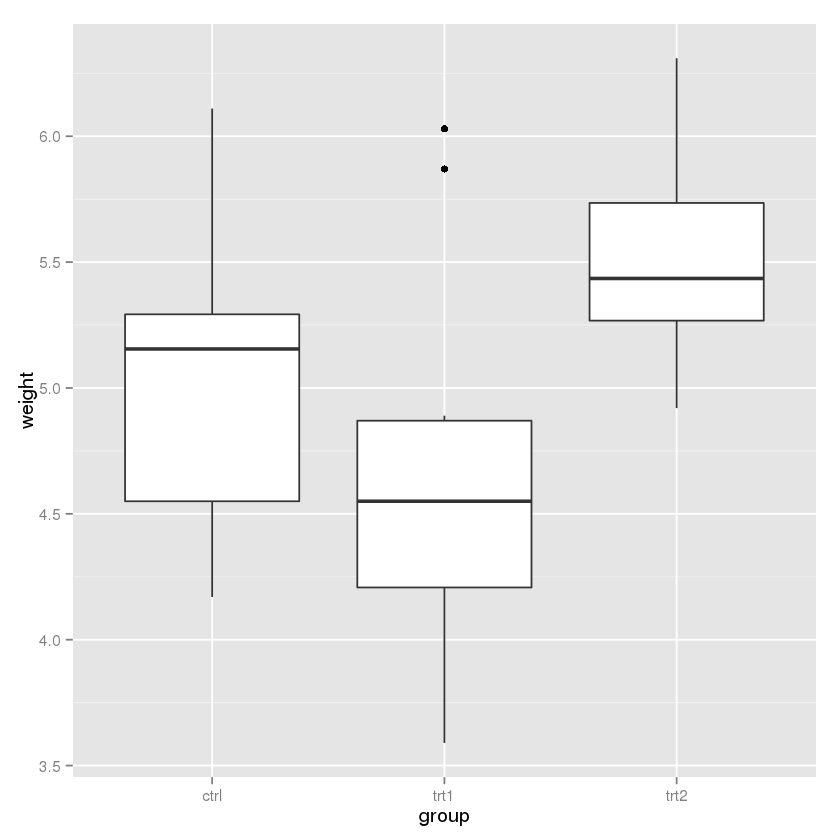

In [1]:
library(ggplot2)

bp <- ggplot(PlantGrowth, aes(x=group, y=weight)) +
    geom_boxplot()
bp

### Swapping X and Y axes

Swap x and y axes (make x vertical, y horizontal):

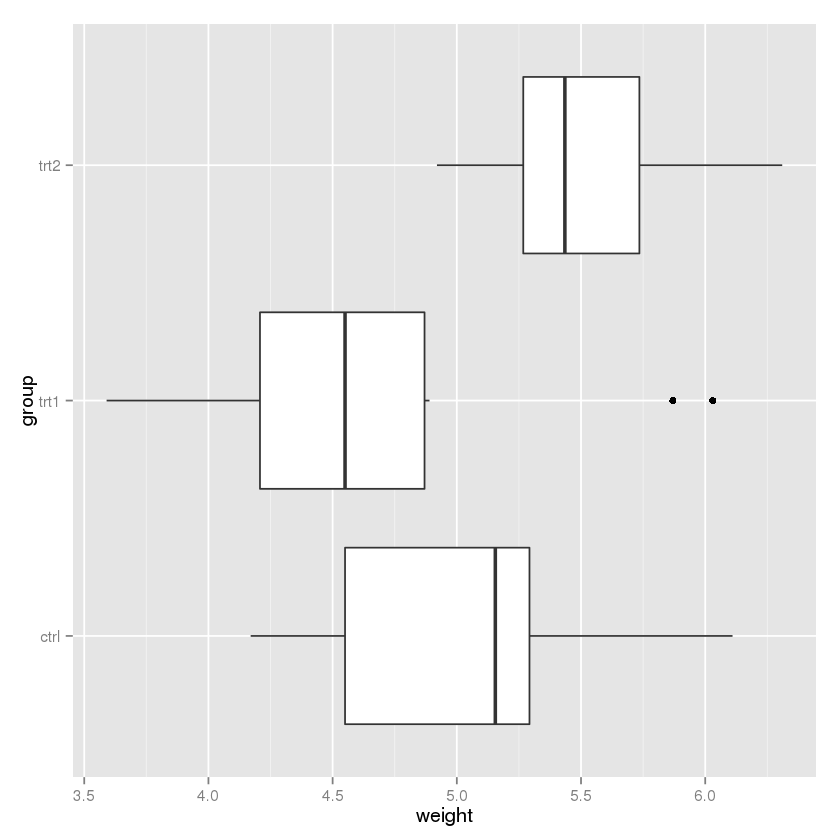

In [2]:
bp + coord_flip()

### Discrete axis

#### Changing the order of items

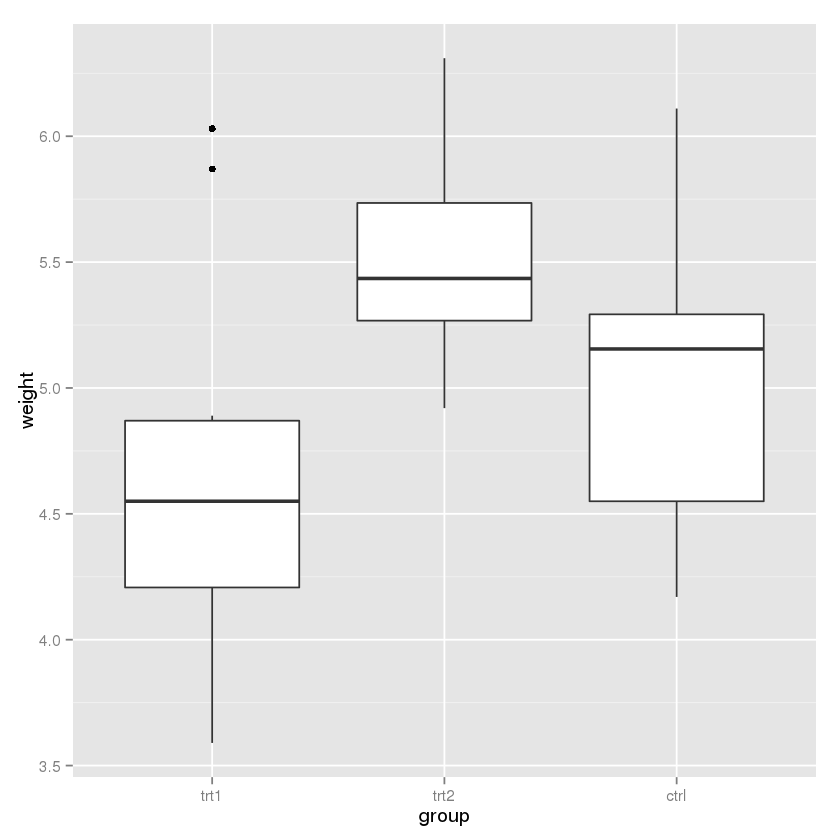

In [3]:
# Manually set the order of a discrete-valued axis
bp + scale_x_discrete(limits=c("trt1","trt2","ctrl"))


In [4]:
# Reverse the order of a discrete-valued axis
# Get the levels of the factor
flevels <- levels(PlantGrowth$group)
flevels

[1] "ctrl" "trt1" "trt2"

In [5]:
# Reverse the order
flevels <- rev(flevels)
flevels

[1] "trt2" "trt1" "ctrl"

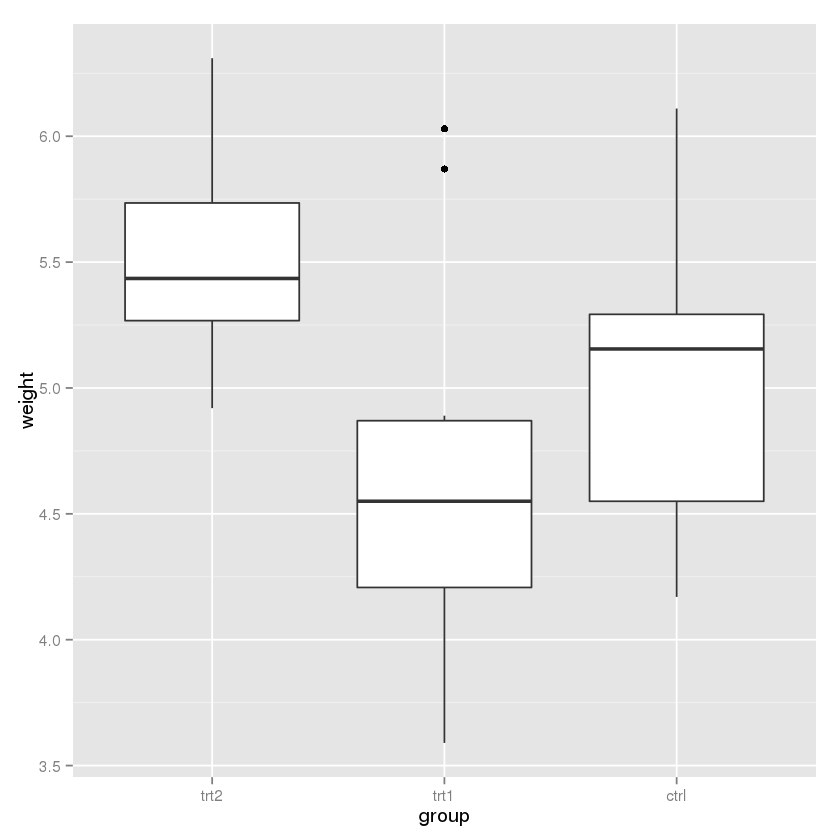

In [6]:
bp + scale_x_discrete(limits=flevels)

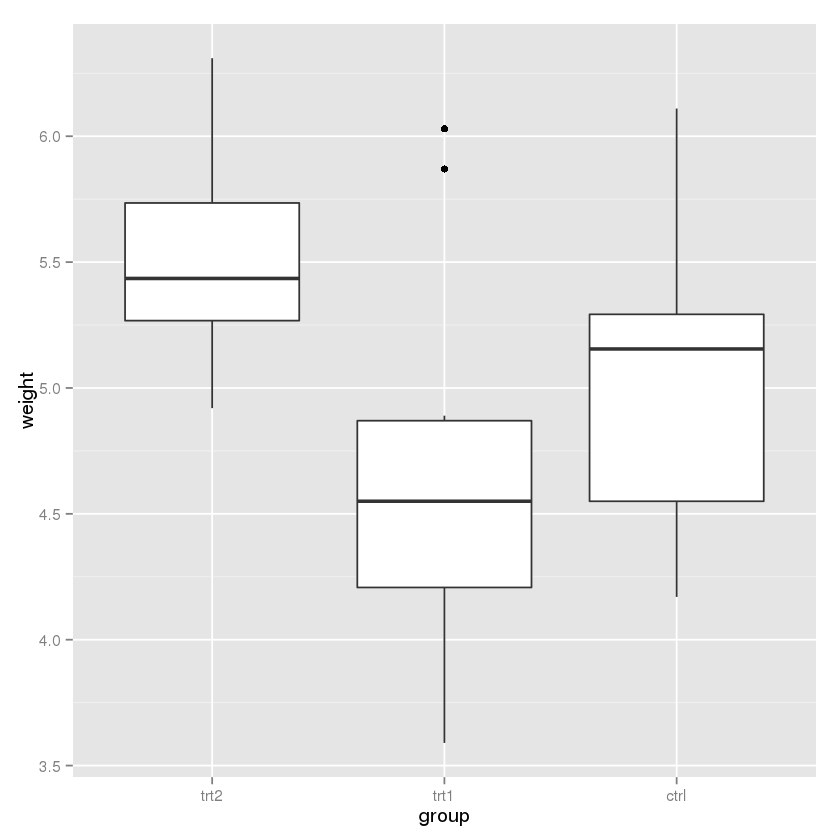

In [7]:
# Or it can be done in one line:
bp + scale_x_discrete(limits = rev(levels(PlantGrowth$group)))

### Setting tick mark labels

For discrete variables, the tick mark labels are taken directly from levels of the factor. However, sometimes the factor levels have short names that aren’t suitable for presentation.

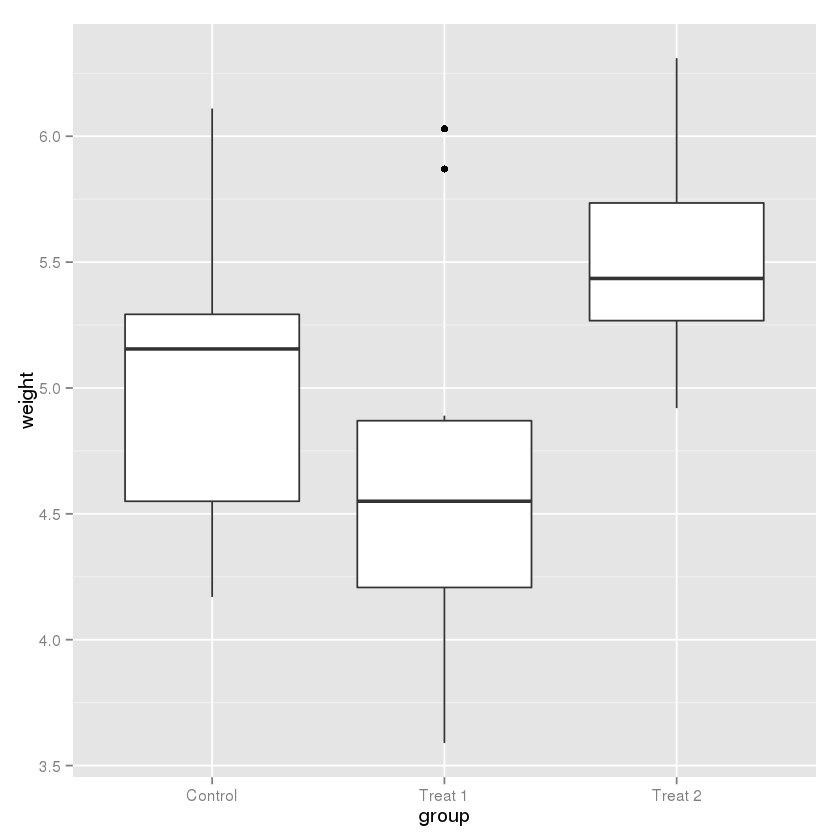

In [8]:
bp + scale_x_discrete(breaks=c("ctrl", "trt1", "trt2"),
                      labels=c("Control", "Treat 1", "Treat 2"))

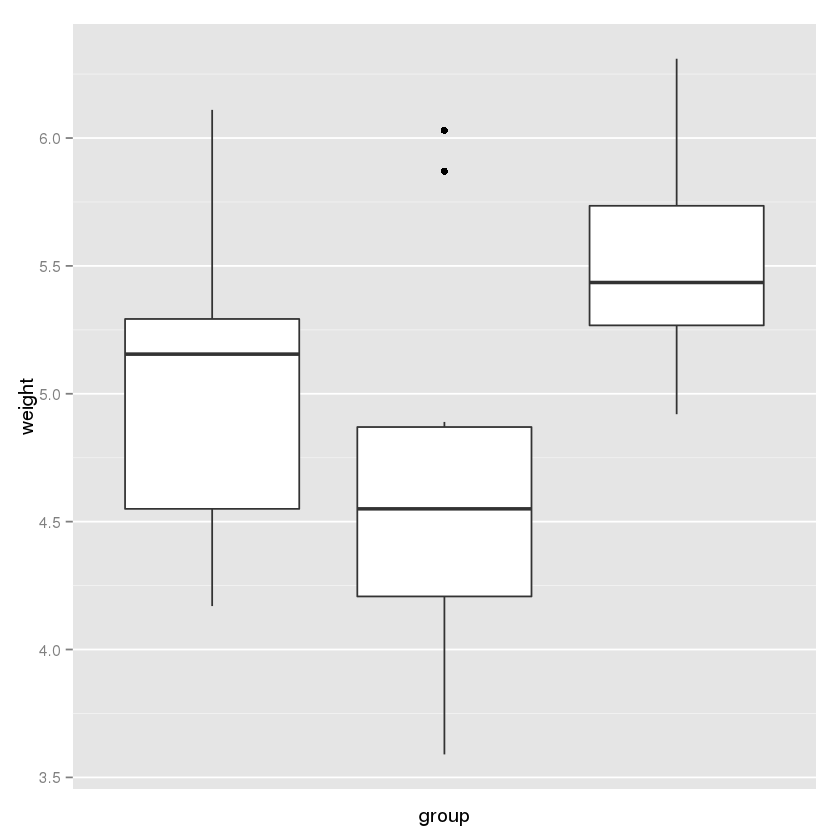

In [9]:
# Hide x tick marks, labels, and grid lines
bp + scale_x_discrete(breaks=NULL)

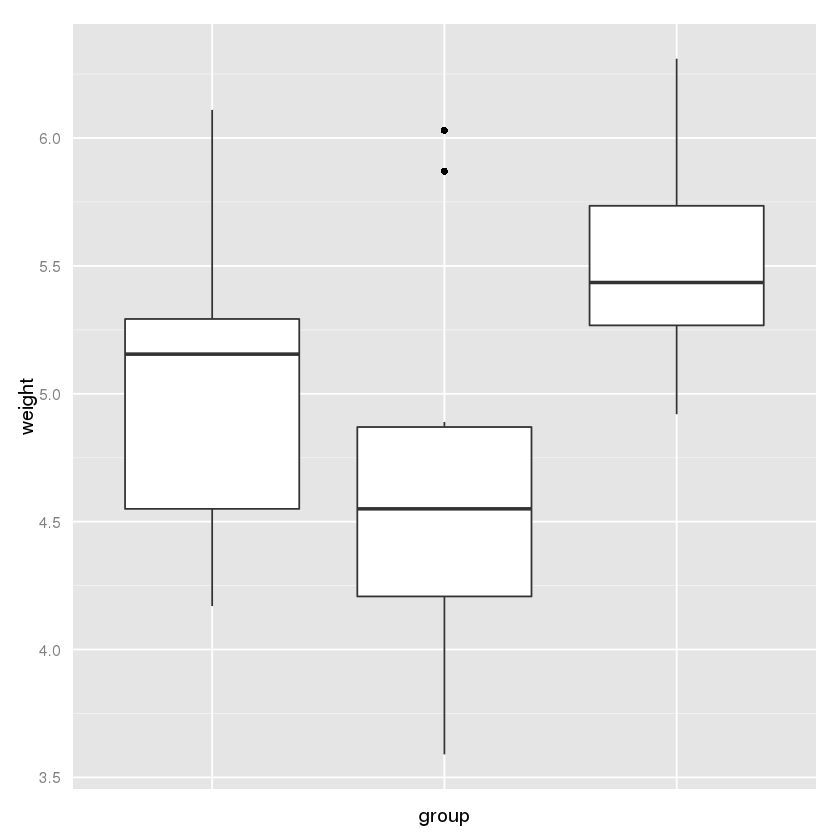

In [10]:
# Hide all tick marks and labels (on X axis), but keep the gridlines
bp + theme(axis.ticks = element_blank(), axis.text.x = element_blank())

### Continuous axis

#### Setting range and reversing direction of an axis

If you simply want to make sure that an axis includes a particular value in the range, use `expand_limits()`. This can only expand the range of an axis; it can’t shrink the range.

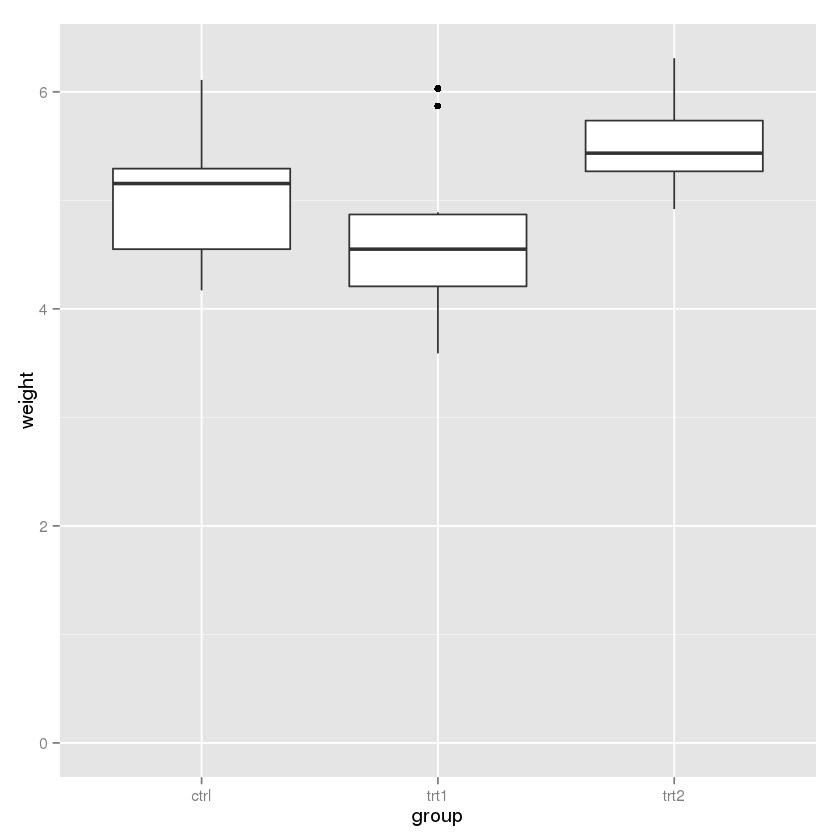

In [11]:
# Make sure to include 0 in the y axis
bp + expand_limits(y=0)

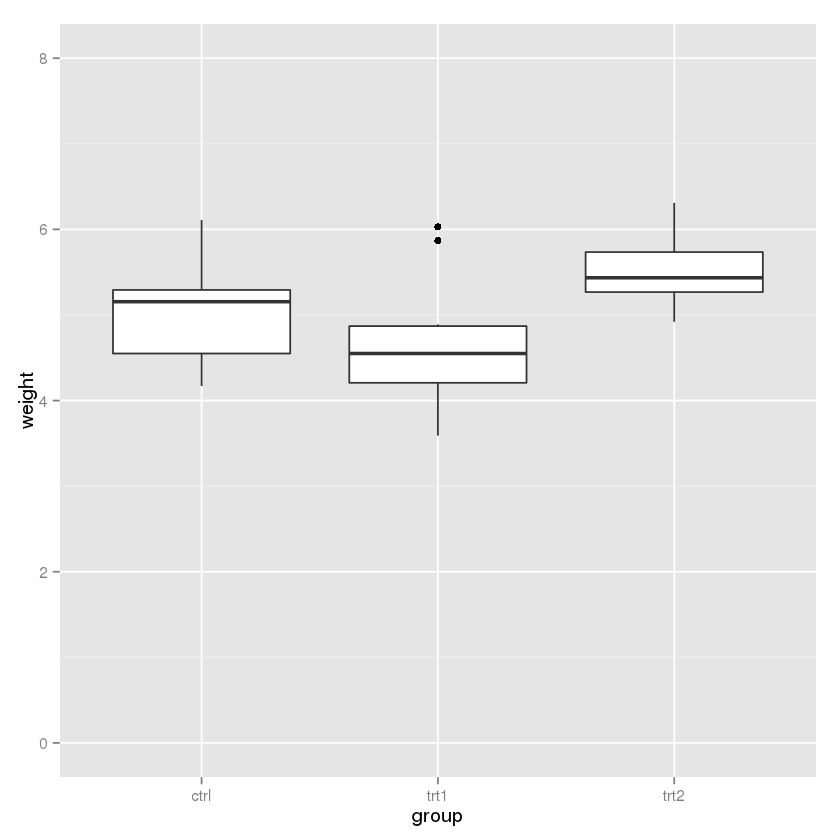

In [12]:
# Make sure to include 0 and 8 in the y axis
bp + expand_limits(y=c(0,8))

You can also explicitly set the y limits. Note that if **any** `scale_y_continuous` command is used, it overrides any `ylim` command, and the `ylim` will be ignored.

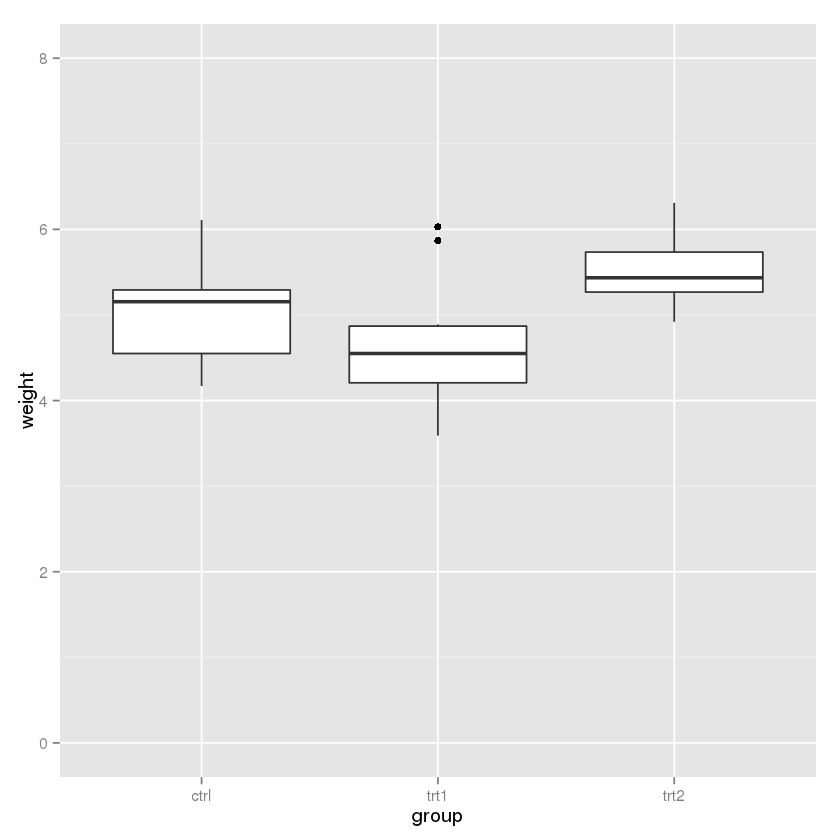

In [13]:
# Set the range of a continuous-valued axis
# These are equivalent
bp + ylim(0, 8)
# bp + scale_y_continuous(limits=c(0, 8))

If the y range is reduced using the method above, the data outside the range is ignored. This might be OK for a scatterplot, but it can be problematic for the box plots used here. For bar graphs, if the range does not include 0, the bars will not show at all!

To avoid this problem, you can use `coord_cartesian` instead. Instead of setting the limits of the data, it sets the viewing area of the data.

Warning message:
: Removed 13 rows containing non-finite values (stat_boxplot).

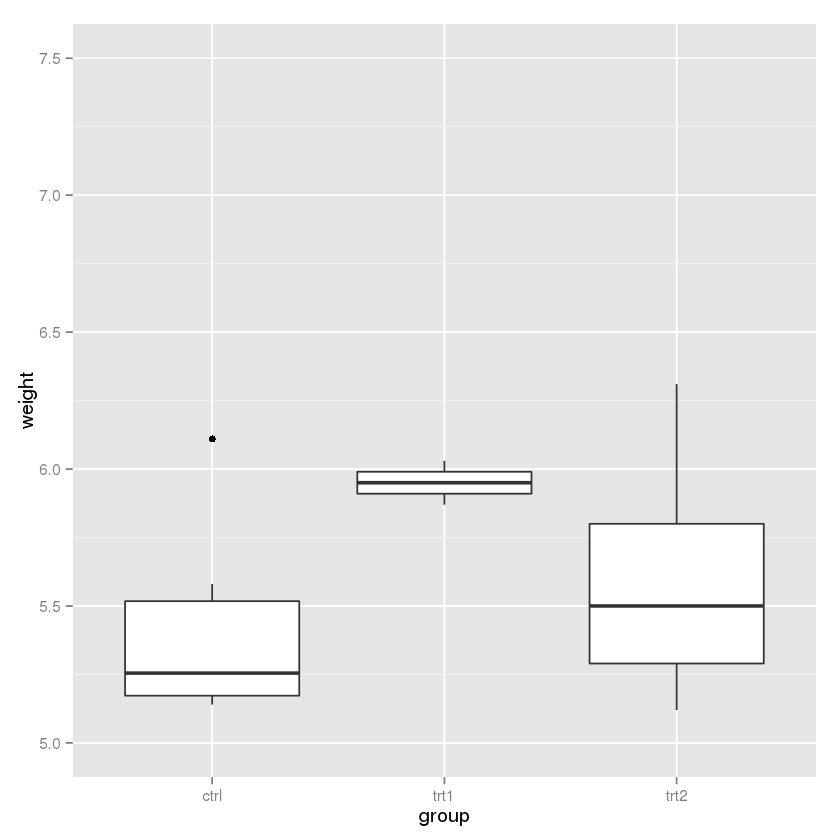

In [14]:
# These two do the same thing; all data points outside the graphing range are
# dropped, resulting in a misleading box plot
bp + ylim(5, 7.5)

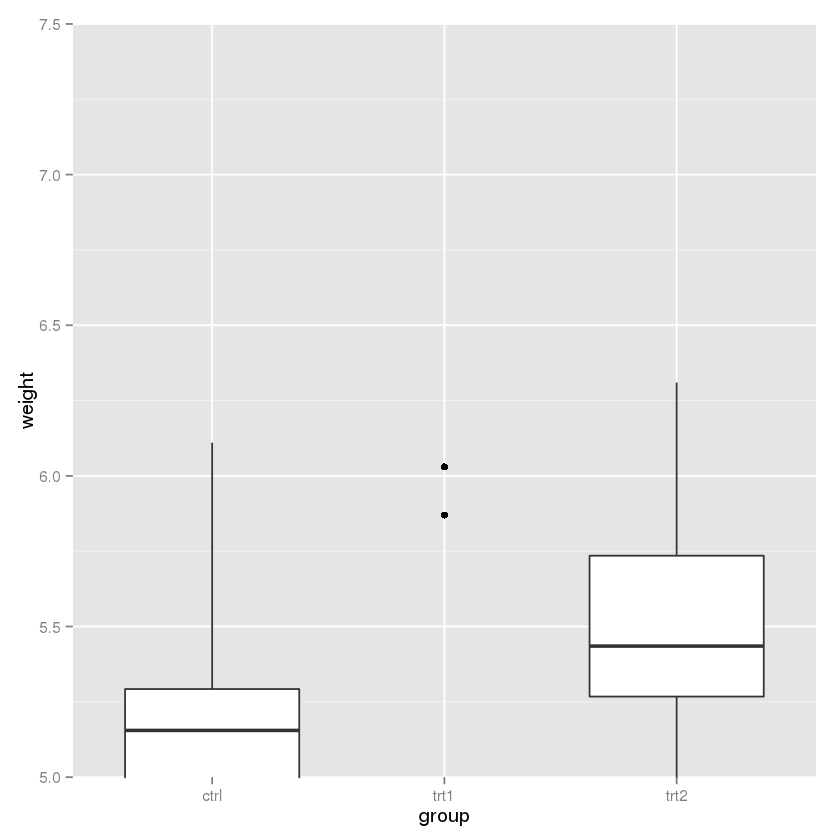

In [15]:
# Using coord_cartesian "zooms" into the area
bp + coord_cartesian(ylim=c(5, 7.5))

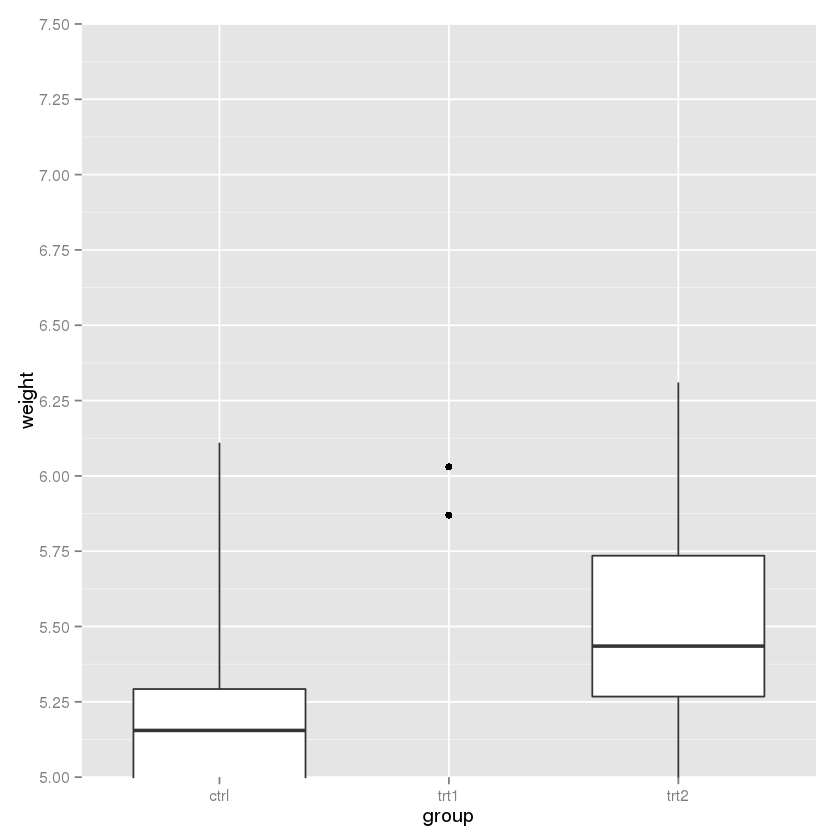

In [16]:
# Specify tick marks directly
bp + coord_cartesian(ylim=c(5, 7.5)) + 
    scale_y_continuous(breaks=seq(0, 10, 0.25))  # Ticks from 0-10, every .25

#### Reversing the direction of an axis

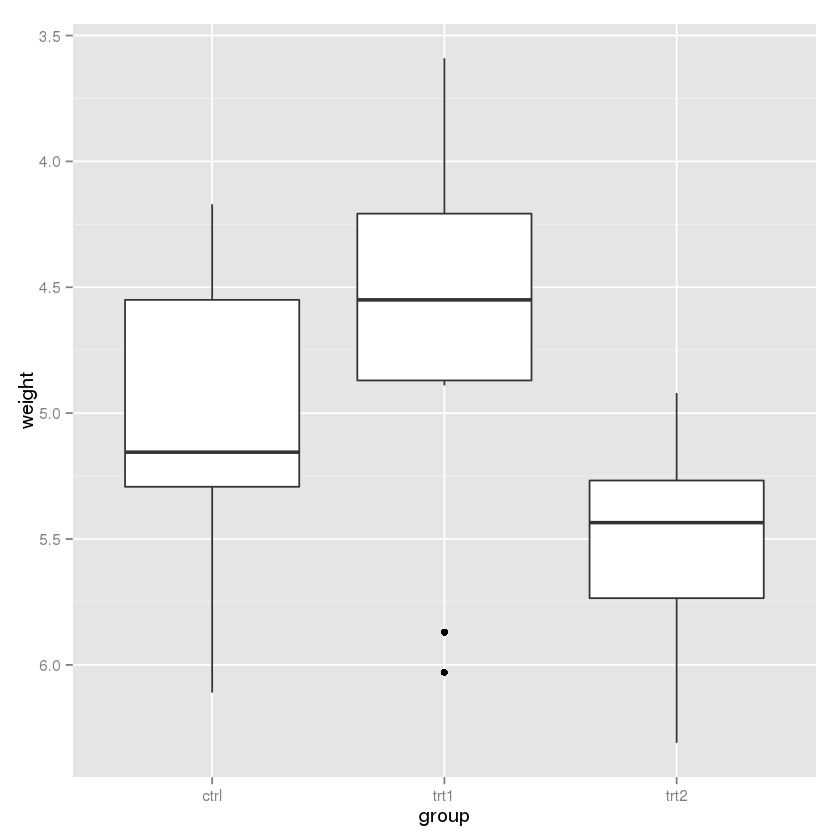

In [17]:
# Reverse order of a continuous-valued axis
bp + scale_y_reverse()

#### Setting and hiding tick markers

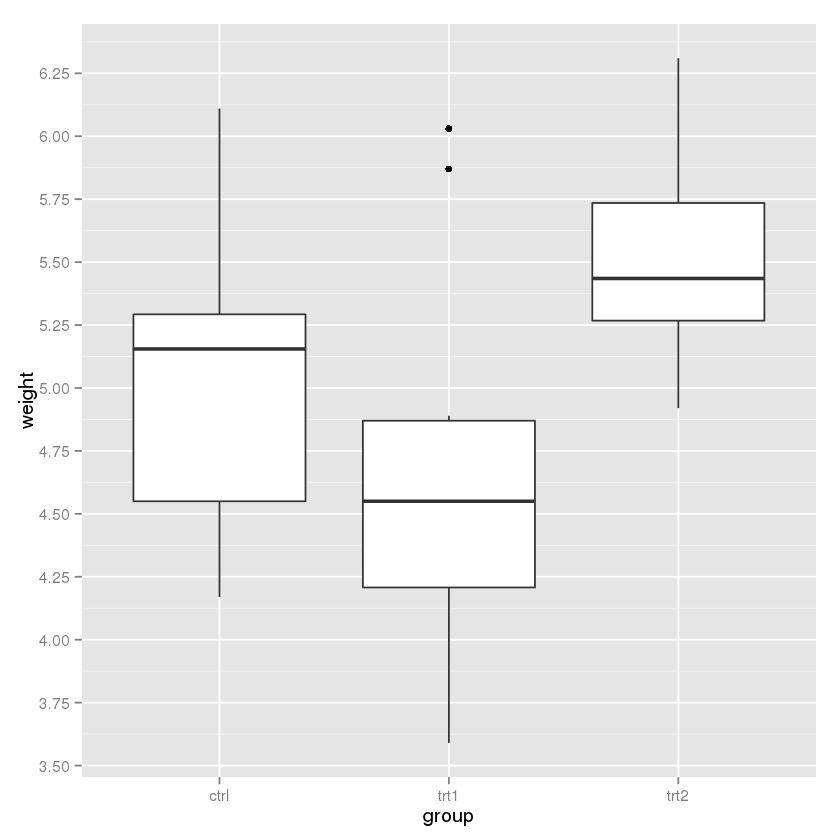

In [18]:
# Setting the tick marks on an axis
# This will show tick marks on every 0.25 from 1 to 10
# The scale will show only the ones that are within range (3.50-6.25 in this case)
bp + scale_y_continuous(breaks=seq(1,10,1/4))

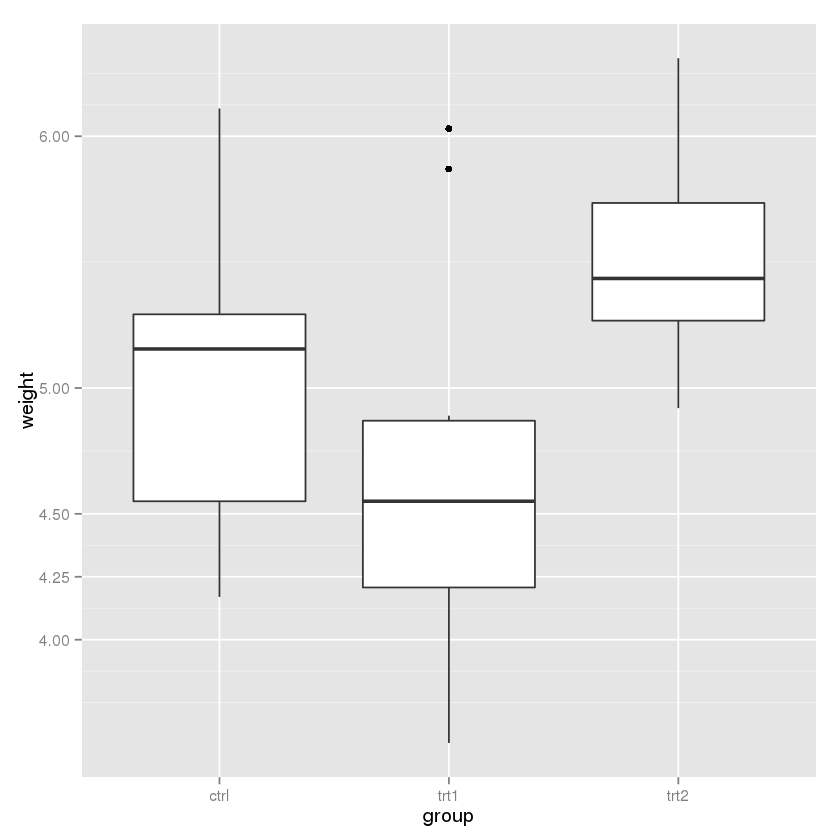

In [19]:
# The breaks can be spaced unevenly
bp + scale_y_continuous(breaks=c(4, 4.25, 4.5, 5, 6,8))

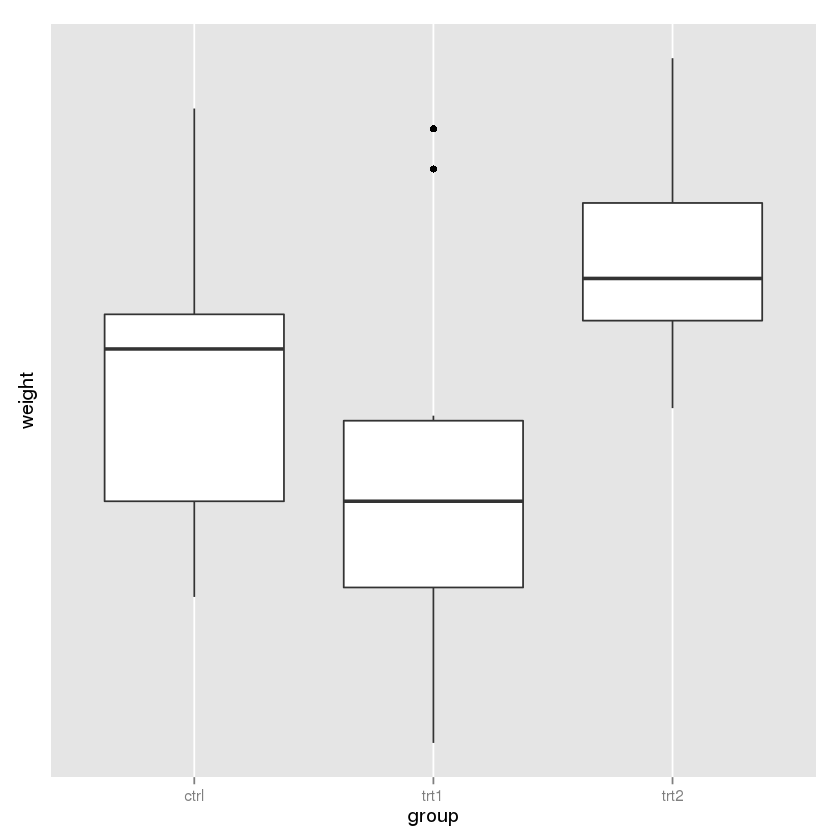

In [20]:
# Suppress ticks and gridlines
bp + scale_y_continuous(breaks=NULL)

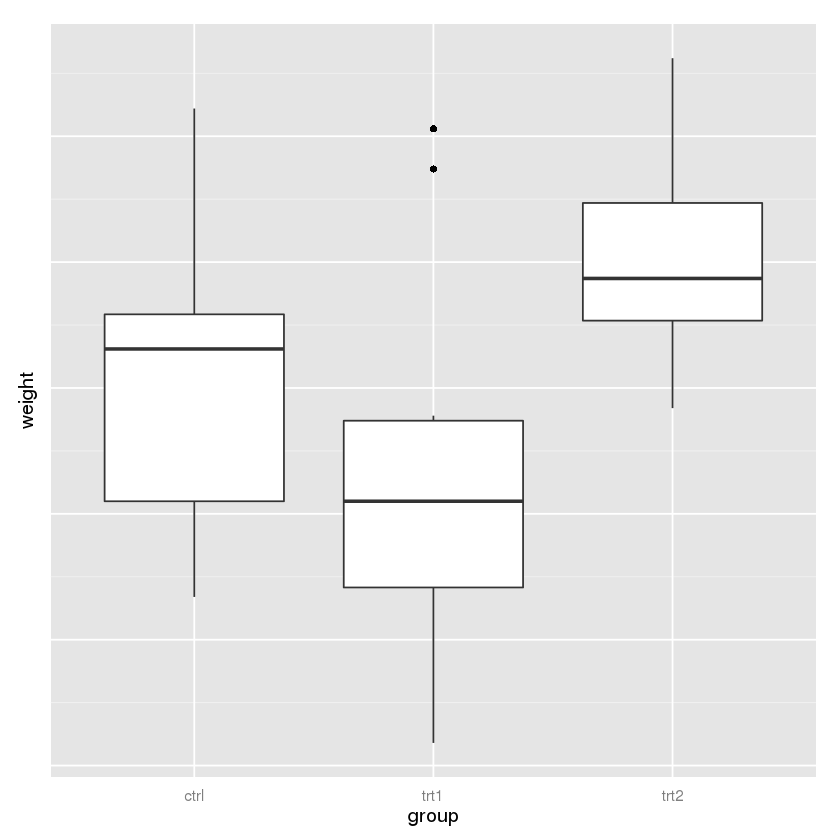

In [21]:
# Hide tick marks and labels (on Y axis), but keep the gridlines
bp + theme(axis.ticks = element_blank(), axis.text.y = element_blank())

#### Axis transformations: log, sqrt, etc.

By default, the axes are linearly scaled. It is possible to transform the axes with log, power, roots, and so on.

There are two ways of transforming an axis. One is to use a `scale` transform, and the other is to use a `coordinate` transform. With a scale transform, the data is transformed before properties such as breaks (the tick locations) and range of the axis are decided. With a coordinate transform, the transformation happens *after* the breaks and scale range are decided. This results in different appearances, as shown below.

In [22]:
# Create some noisy exponentially-distributed data
set.seed(201)
n <- 100
dat <- data.frame(
    xval = (1:n+rnorm(n,sd=5))/20,
    yval = 2*2^((1:n+rnorm(n,sd=5))/20)
)

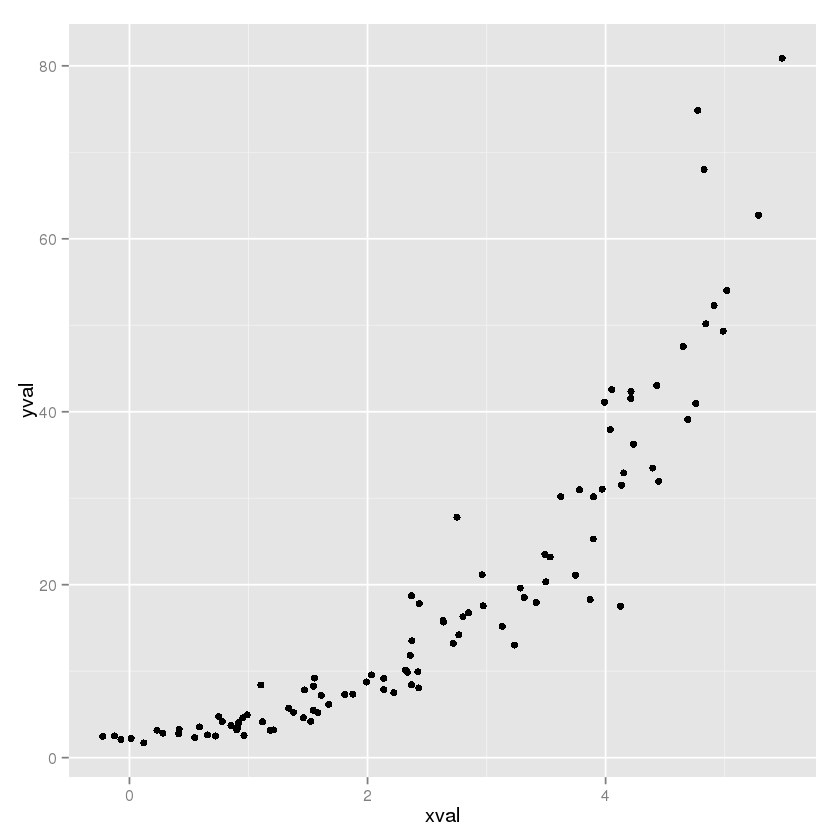

In [23]:
# A scatterplot with regular (linear) axis scaling
sp <- ggplot(dat, aes(xval, yval)) + geom_point()
sp

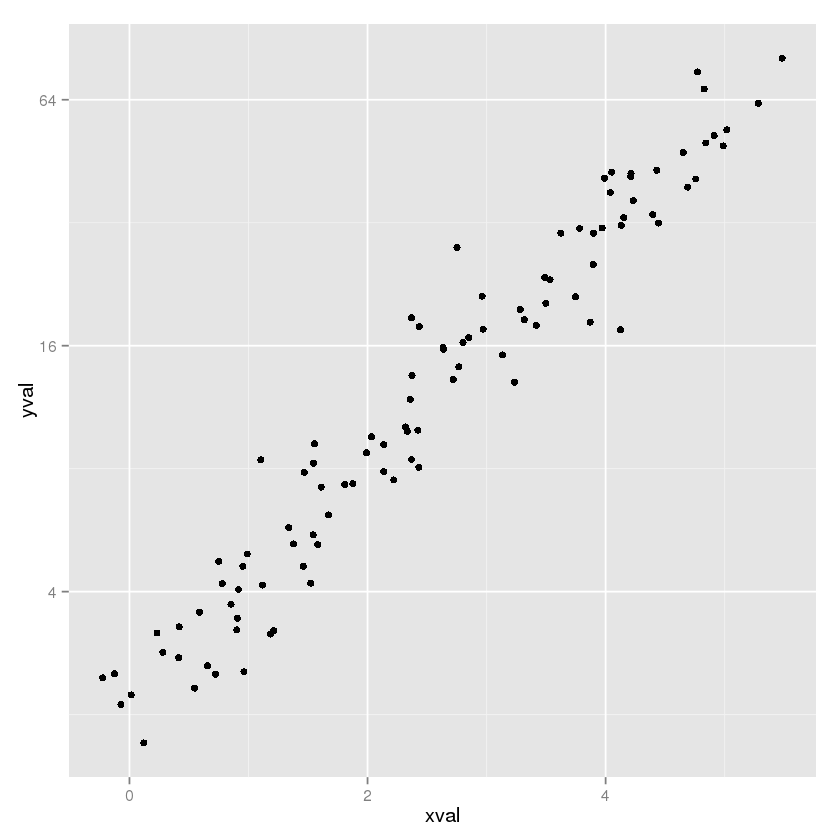

In [24]:
# log2 scaling of the y axis (with visually-equal spacing)
library(scales)     # Need the scales package
sp + scale_y_continuous(trans=log2_trans())

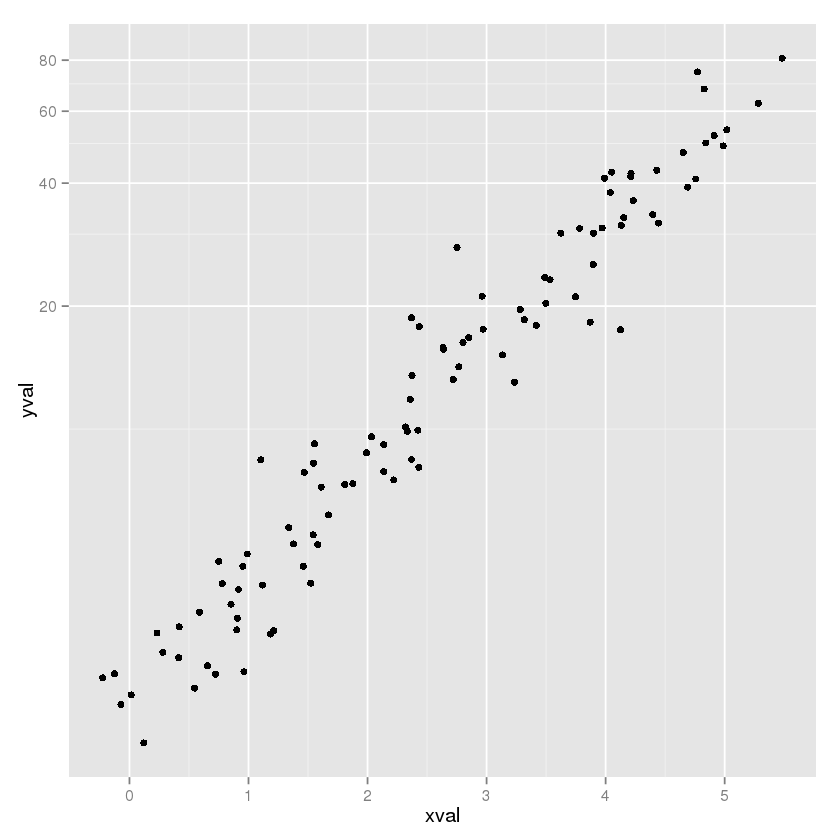

In [25]:
# log2 coordinate transformation (with visually-diminishing spacing)
sp + coord_trans(y="log2")

With a scale transformation, you can also set the axis tick marks to show exponents.

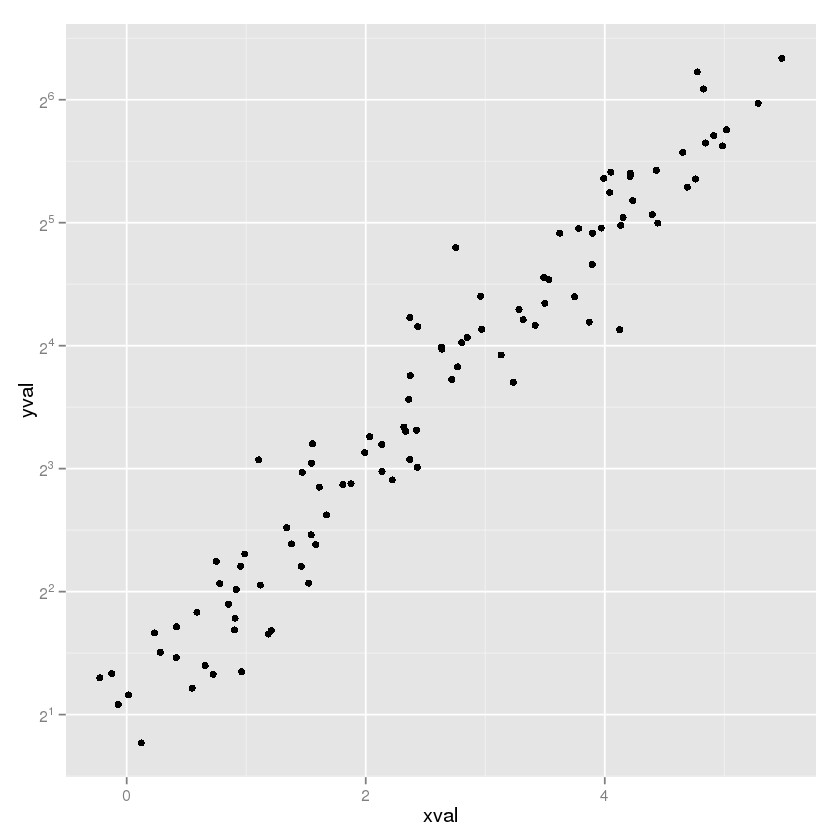

In [26]:
sp + scale_y_continuous(trans = log2_trans(),
                        breaks = trans_breaks("log2", function(x) 2^x),
                        labels = trans_format("log2", math_format(2^.x)))

Many transformations are available. See `?trans_new` for a full list. If the transformation you need isn’t on the list, it is possible to write your own transformation function.

A couple scale transformations have convenience functions: `scale_y_log10` and `scale_y_sqrt` (with corresponding versions for x).

In [27]:
set.seed(205)
n <- 100
dat10 <- data.frame(
    xval = (1:n+rnorm(n,sd=5))/20,
    yval = 10*10^((1:n+rnorm(n,sd=5))/20)
)

sp10 <- ggplot(dat10, aes(xval, yval)) + geom_point()


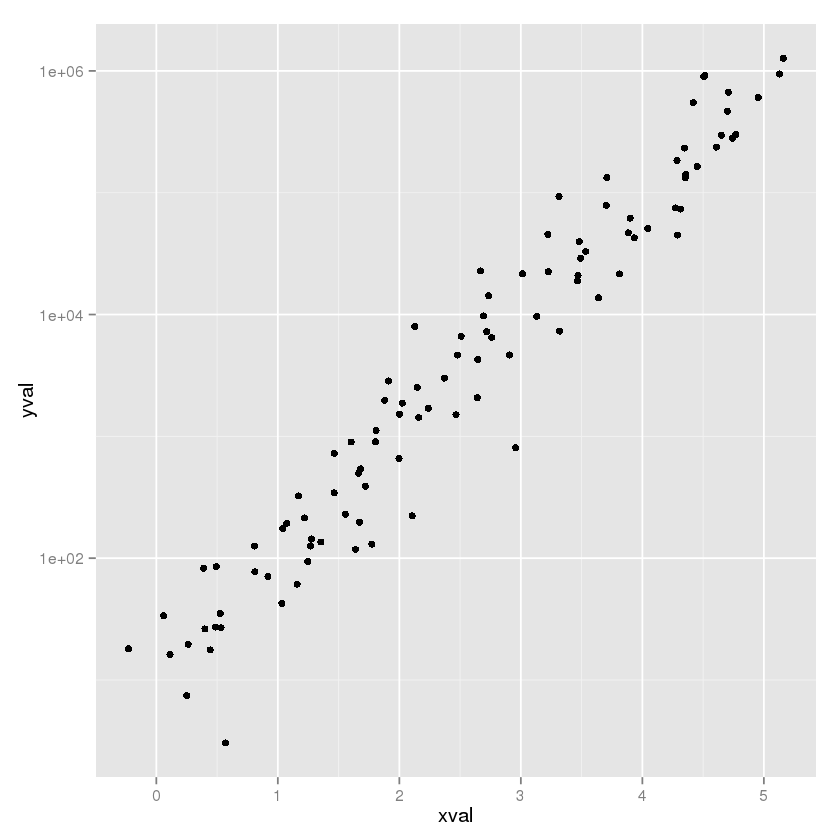

In [28]:
# log10
sp10 + scale_y_log10()

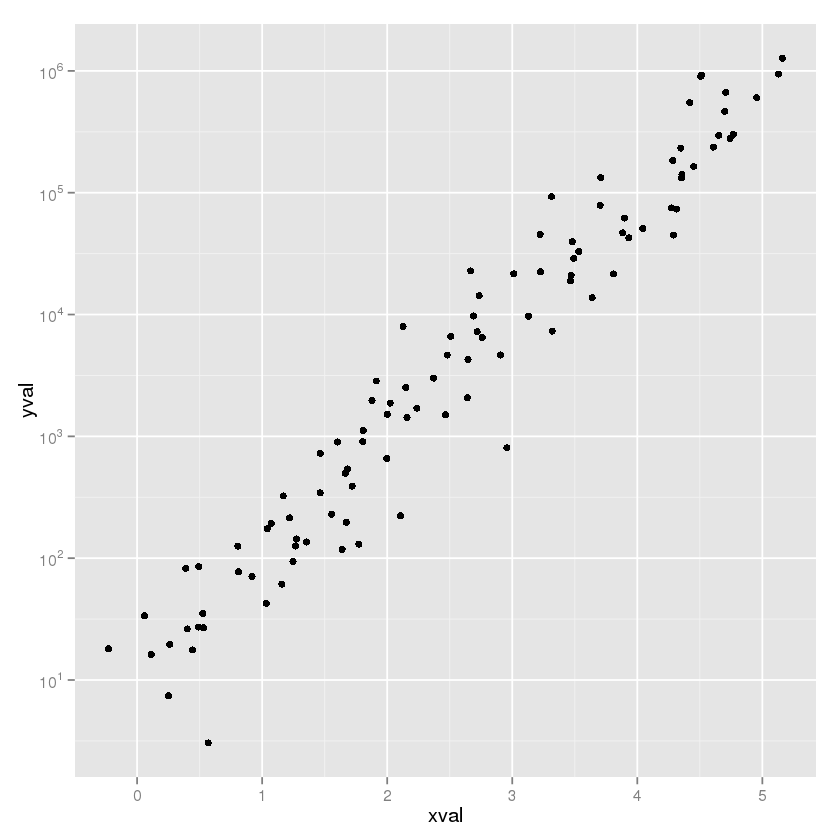

In [29]:
# log10 with exponents on tick labels
sp10 + scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
                     labels = trans_format("log10", math_format(10^.x)))

### Fixed ratio between x and y axes

It is possible to set the scaling of the axes to an equal ratio, with one visual unit being representing the same numeric unit on both axes. It is also possible to set them to ratios other than 1:1.

In [30]:
# Data where x ranges from 0-10, y ranges from 0-30
set.seed(202)
dat <- data.frame(
    xval = runif(40,0,10),
    yval = runif(40,0,30)
)
sp <- ggplot(dat, aes(xval, yval)) + geom_point()

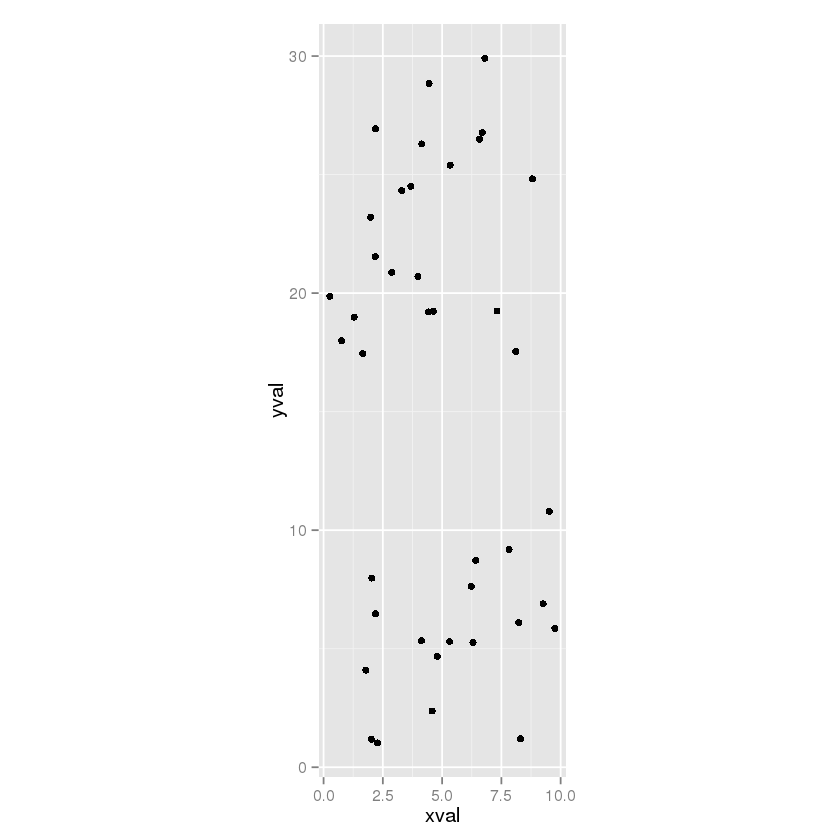

In [31]:
# Force equal scaling
sp + coord_fixed()

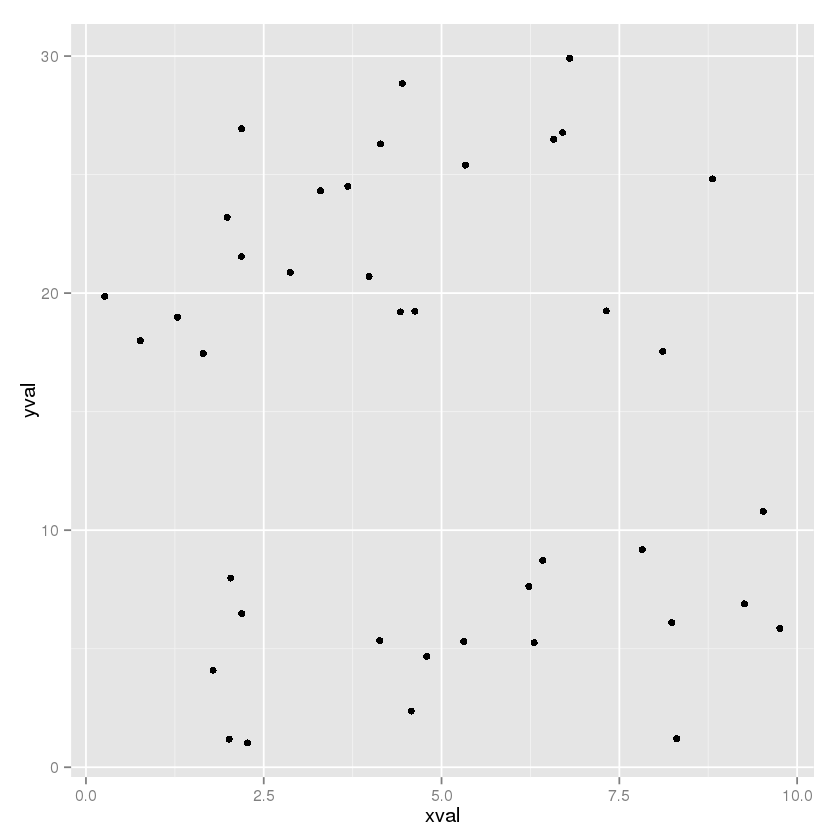

In [32]:
# Equal scaling, with each 1 on the x axis the same length as y on x axis
sp + coord_fixed(ratio=1/3)

### Axis labels and text formatting

To set and hide the axis labels:

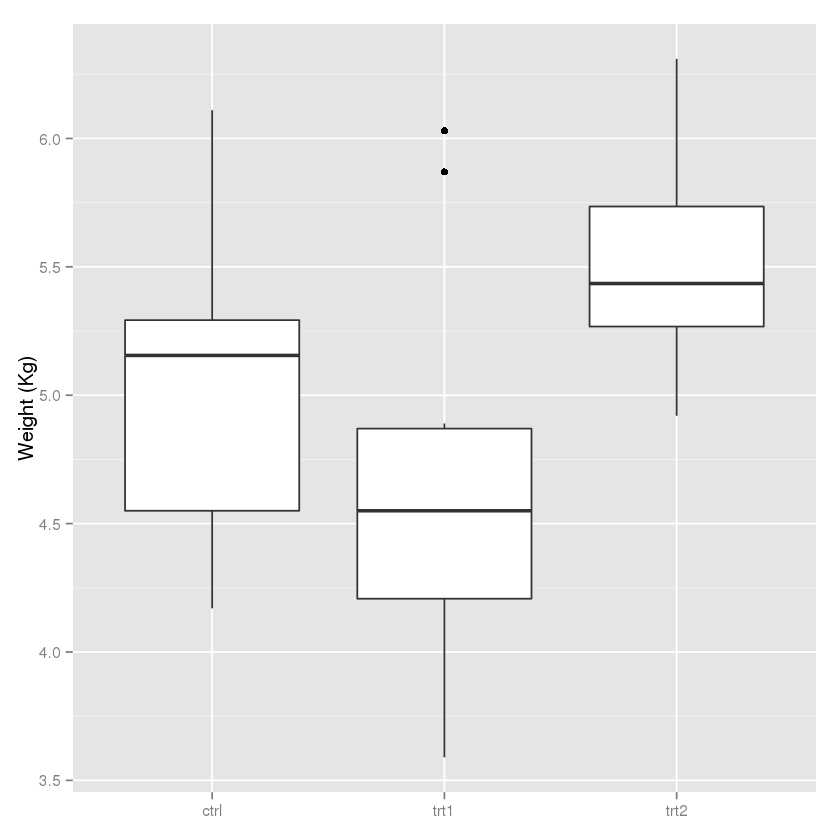

In [33]:
bp + theme(axis.title.x = element_blank()) +   # Remove x-axis label
     ylab("Weight (Kg)")                       # Set y-axis label

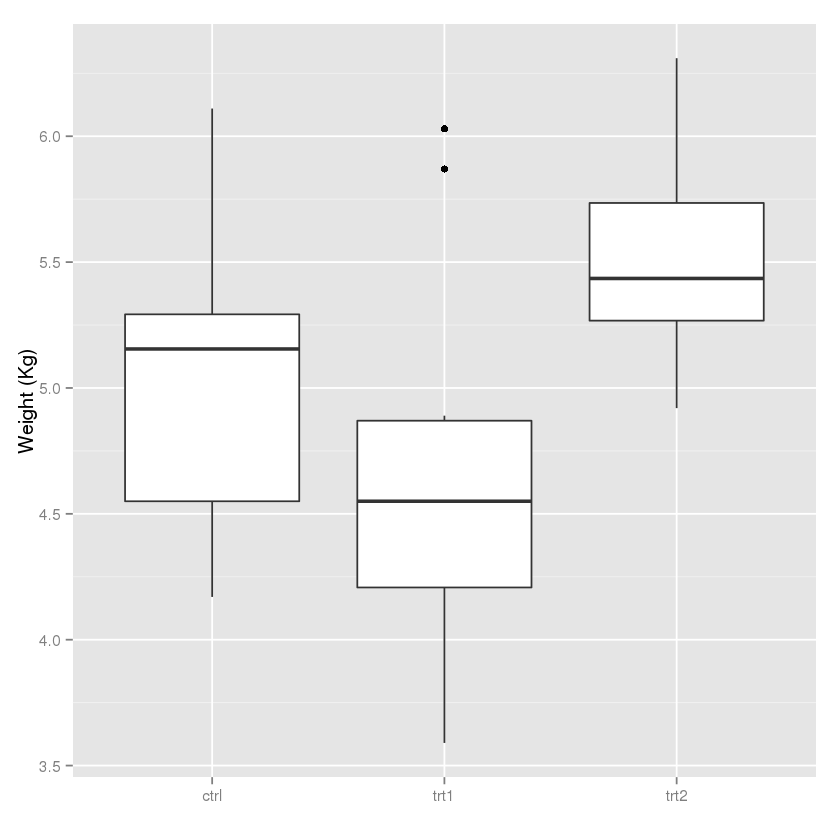

In [34]:
# Also possible to set the axis label with the scale
# Note that vertical space is still reserved for x's label
bp + scale_x_discrete(name="") +
     scale_y_continuous(name="Weight (Kg)")

To change the fonts, and rotate tick mark labels:

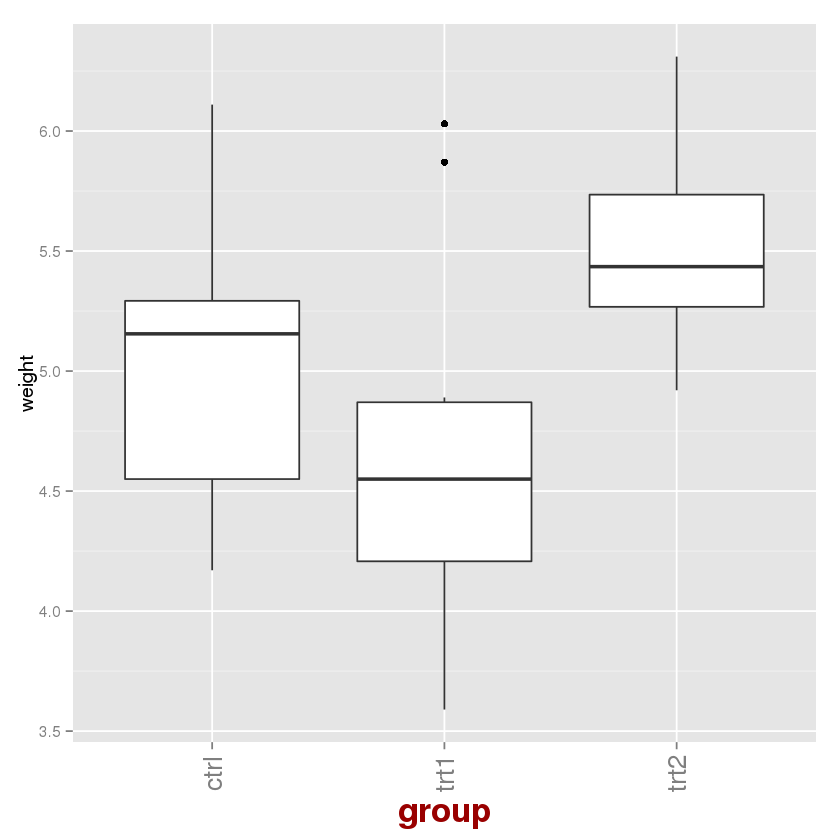

In [35]:
# Change font options:
# X-axis label: bold, red, and 20 points
# X-axis tick marks: rotate 90 degrees CCW, move to the left a bit (using vjust,
#   since the labels are rotated), and 16 points
bp + theme(axis.title.x = element_text(face="bold", colour="#990000", size=20),
           axis.text.x  = element_text(angle=90, vjust=0.5, size=16))

### Tick mark label text formatters

You may want to display your values as percents, or dollars, or in scientific notation. To do this you can use a **formatter**, which is a function that changes the text:

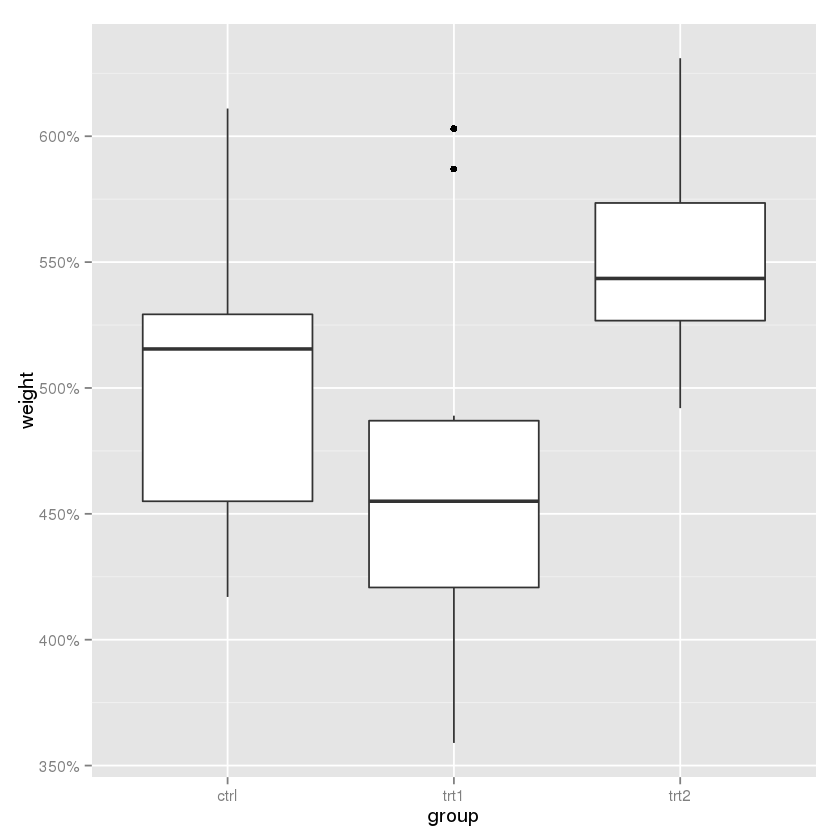

In [36]:
# Label formatters
library(scales)   # Need the scales package
bp + scale_y_continuous(labels=percent) +
     scale_x_discrete(labels=abbreviate)  # In this particular case, it has no effect

Other useful formatters for continuous scales include `comma`, `percent`, `dollar`, and `scientific`. For discrete scales, `abbreviate` will remove vowels and spaces and shorten to four characters. For dates, use `date_format`.

Sometimes you may need to create your own formatting function. This one will display numeric minutes in HH:MM:SS format.

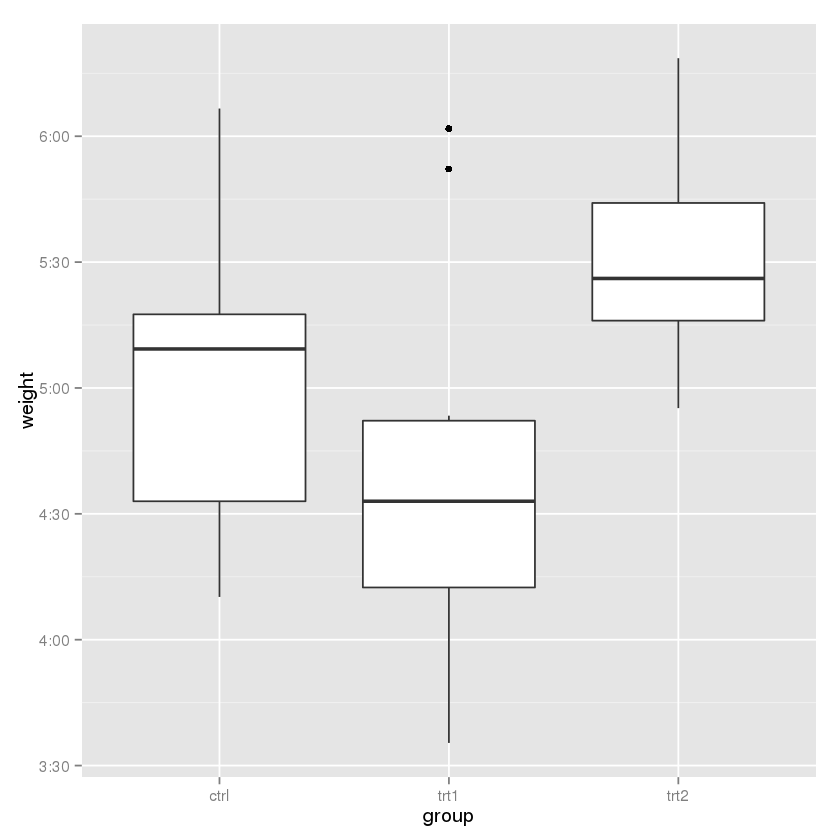

In [37]:
# Self-defined formatting function for times.
timeHMS_formatter <- function(x) {
    h <- floor(x/60)
    m <- floor(x %% 60)
    s <- round(60*(x %% 1))                   # Round to nearest second
    lab <- sprintf('%02d:%02d:%02d', h, m, s) # Format the strings as HH:MM:SS
    lab <- gsub('^00:', '', lab)              # Remove leading 00: if present
    lab <- gsub('^0', '', lab)                # Remove leading 0 if present
}

bp + scale_y_continuous(label=timeHMS_formatter)

### Hiding gridlines

To hide all gridlines, both vertical and horizontal:

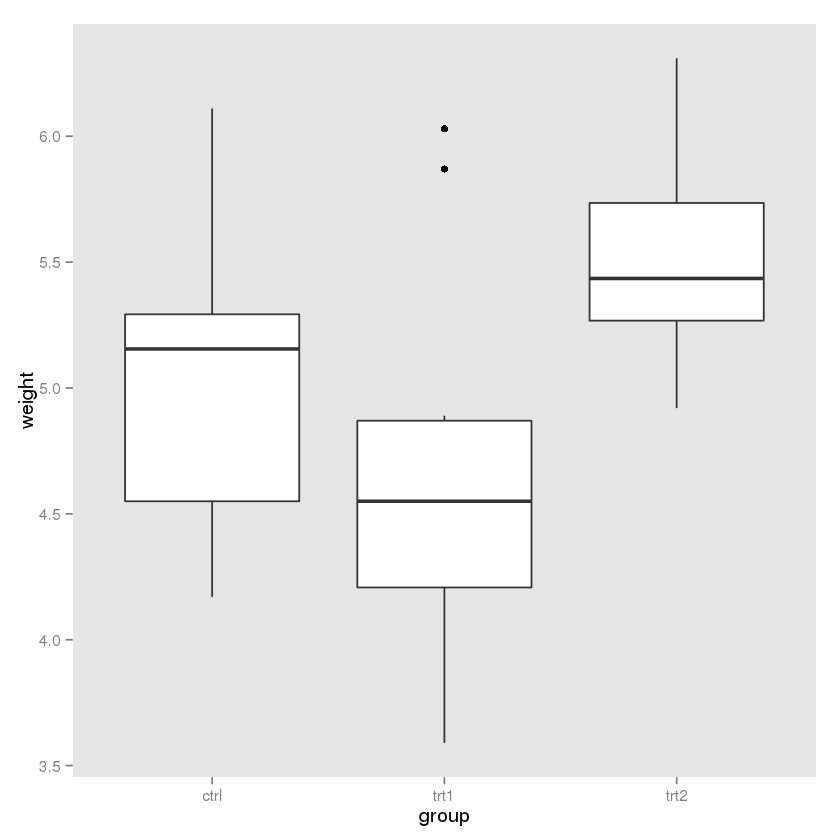

In [38]:
# Hide all the gridlines
bp + theme(panel.grid.minor=element_blank(),
           panel.grid.major=element_blank())

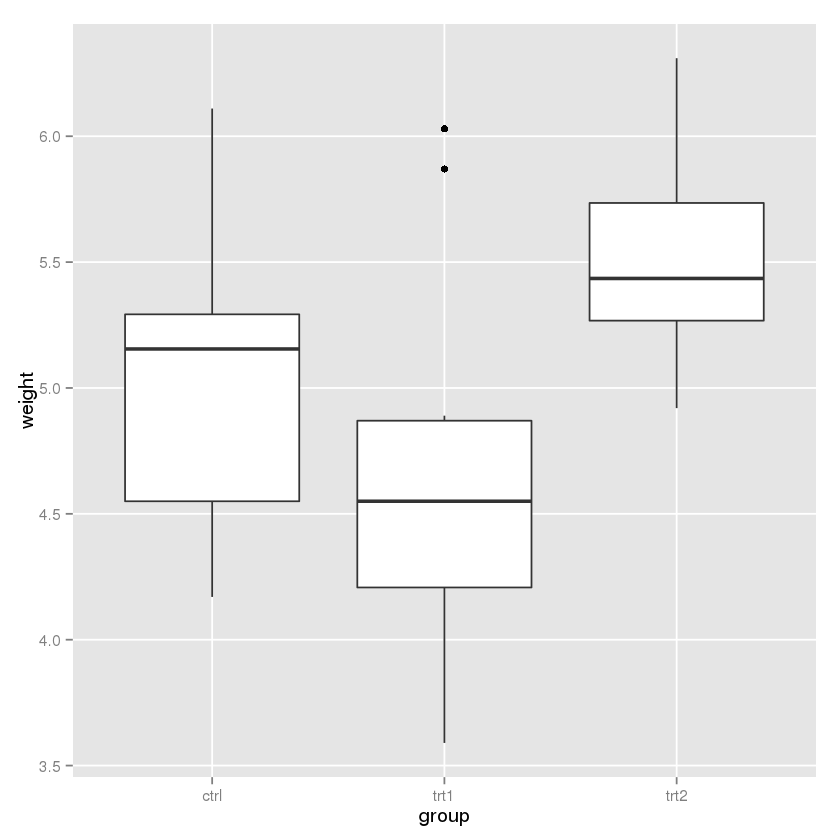

In [39]:
# Hide just the minor gridlines
bp + theme(panel.grid.minor=element_blank())

It’s also possible to hide just the vertical or horizontal gridlines:

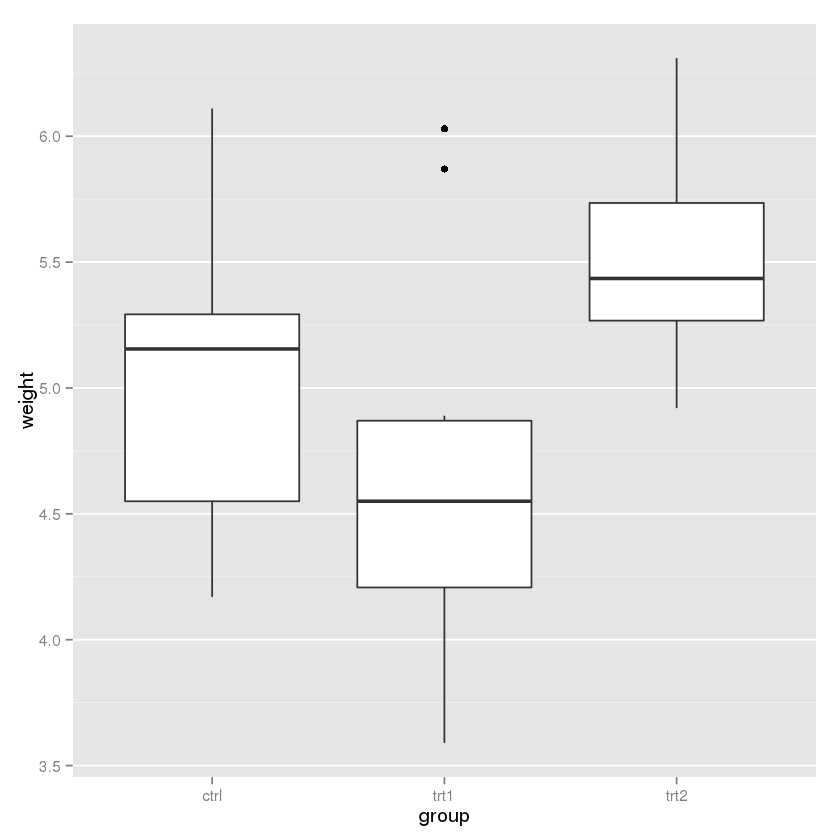

In [40]:
# Hide all the vertical gridlines
bp + theme(panel.grid.minor.x=element_blank(),
           panel.grid.major.x=element_blank())


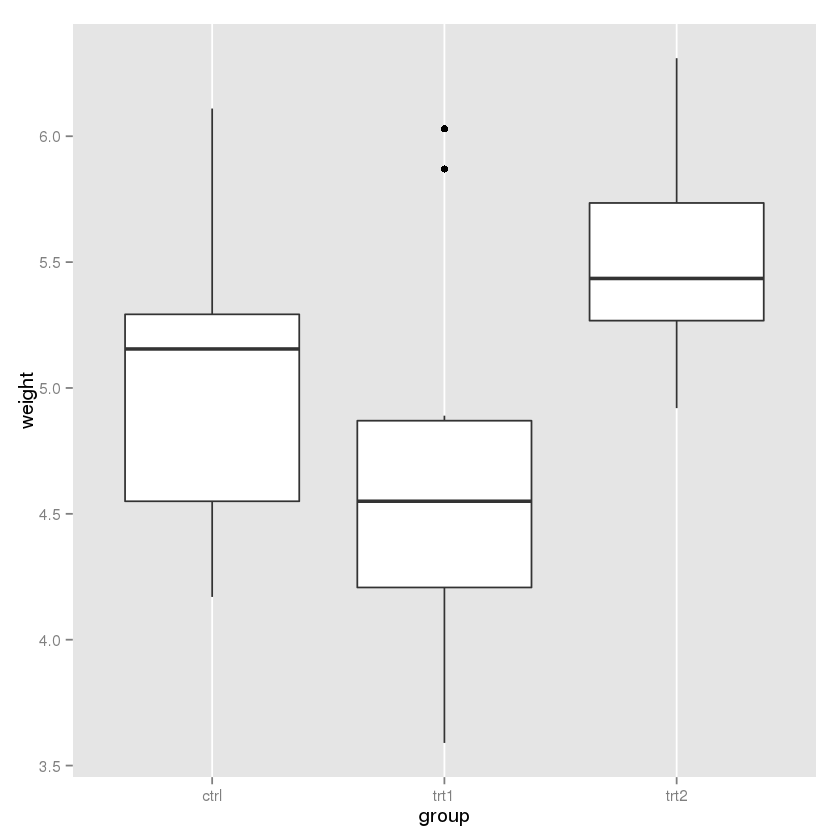

In [41]:
# Hide all the horizontal gridlines
bp + theme(panel.grid.minor.y=element_blank(),
           panel.grid.major.y=element_blank())